# The 'Hello World' of Deep Learning in fastai
> A tutorial on end to end Image Classification in fastai.

- badges: true
- comments: true
- author: Rajas Kakodkar
- image: images/image-classification-thumbnail.png
- categories: [Deep Learning]

## for the reader

```
if you cannot answer more than two questions given below and can code in any language:
    continue reading this blog post
else if you do not know to code in any language:
    come back here after gaining some experience in any coding language preferably Python
else:
    you probably know everything that is covered in this blog post
```

1. What is a jupyter notebook?
2. What is Deep Learning?
3. What is a Dataset?
4. What is Image Classification? 
5. What is fastai?

I have written this blog post keeping my younger self (from early 2018) in mind when I didn't know the answers to any of the above questions but had some coding experience in C++ and Python. In this article, I will try to show how to build a `Guitar Classifier` to predict the type of Guitar (Acoustic, Classical or Electric) from an image. This article covers end to end Image Classification in [`fastai`](https://docs.fast.ai) library right from getting the `data`, training a `model`, to making an `app` which deploys it. That does sound unrealistic for someone who doesn't even know what `Deep Learning` is, but believe you me, it is totally possible; all thanks to [Jeremy Howard](https://twitter.com/jeremyphoward), [Rachel Thomas](https://twitter.com/math_rachel/) and [Sylvain Gugger](https://twitter.com/GuggerSylvain), for showing it in the amazing [fastai course](https://course.fast.ai/) and the book `Deep Learning for Coders with fastai and PyTorch: AI Applications Without a PhD` which you can get on [Amazon](https://www.amazon.in/Deep-Learning-Coders-fastai-PyTorch/dp/9385889133/ref=sr_1_7?crid=1R5NR3A2OAOI0&dchild=1&keywords=deep+learning&qid=1600371896&sprefix=deep+leae%2Caps%2C321&sr=8-7) and is also freely available in the form of jupyter notebooks as [fastbook](https://github.com/fastai/fastbook). This article is a derivative of the first two lessons of the course and the book.

## What is Deep Learning?

![](https://thumbs.gfycat.com/LimpingDarlingFinnishspitz-small.gif "Credit: https://www.youtube.com/watch?v=aircAruvnKk")

Deep Learning is a technique of writing a computer program which gives predictions on input data using a `neural network` with multiple layers. For example, a program which predicts the type of guitar from an image or a program which predicts whether a movie review is positive or not. The cool thing about such a program is that it is not fed with detailed steps on how to predict but it learns to predict based on the patterns it finds from the data shown to it during `training`. This task of predicting is not limited to recognising images or sentiment in a text but can be extended to any problem that can be thought of. According to the [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem), neural networks can solve any problem to any level of accuracy in theory. 

A neural network learns to predict by adjusting its parameters. The whole idea of training a neural network model is to find the right set of parameters for the given problem. It starts with random parameters and then based on `how good or bad` its predictions are on the training data, the parameters are adjusted by an algorithm called `Stocastic Gradient Descent`. This process is complex and has a lot of nuances which I have oversimplified in one line. The logic behind it is that you do not need to know how a Neural Network works in depth to `train` one, the same way that you do not need to know the working of Internal Combustion Engine to drive a car. This is based on the principle of Top Down approach shown in fastai course.

> Tip: History of Deep Learning and Neural Networks is covered extensively in fastbook, check it out if you are interested. It also covers the basic working of Neural Network very well in its early chapters which you may be interested in knowing at this point. However it is not a necessary but a sufficient condition to read the rest of the blog. The above gif has been taken from 3Blue1Brown's series on Neural Networks, you may check it out to learn basics of Neural Networks from some interesting visualisations.

## What is fastai?

[fastai](https://github.com/fastai/fastai) is an open-source Deep Learning library developed at [fast.ai](https://fast.ai) by Jeremy Howard, Rachel Thomas and Sylvain Gugger. This library is a wrapper over [PyTorch],(https://pytorch.org/) which is a Deep Learning platform by Facebook. fastai is designed in such a way that you can do a lot of things and get great results with few lines of code which makes it great for beginners and for Practical Deep Learning coders. Having said that, fastai has proven great for cutting edge research in Deep Learning.

> Note: In this article we will be using fastai v2

> Important: In the course of this article or during development with fastai if you get stuck with any error or question, please check out the [fastai forums](https://forums.fast.ai/). This is where the fastai community hangs out and there is a high chance that someone has already come across the same error and found a solution to it! You may also join the [Discord server](https://discord.com/invite/YKrxeNn) of fastai to reach out to the community.

## Environment

### Jupyter Notebook

If python is the lingua franca of Deep Learning then jupyter notebook is the tool where it is written. It is a software where you can write documentation (with images, gifs, etc) as well as code in one place. As a matter of fact, this blog post has been written in jupyter notebook - all thanks to [fastpages](https://github.com/fastai/fastpages). Jupyter notebook has two types of cells, markdown (for text) and code. To execute a cell, you should hit `Shift+Enter` and it gives the output of the cell, below it. I will not get into the details of jupyter notebook as you can learn it from Jeremy in the fastai couse [here](https://youtu.be/_QUEXsHfsA0?t=1887) and also from [this notebook](https://github.com/fastai/fastbook/blob/master/app_jupyter.ipynb).

### Google Colab

As I have already mentioned, Deep Learning models are not usual programs hence they do not run on usual CPUs; they require NVIDIA GPU. This is a Graphics Processor with high compute power able to do thousands of tasks parallelly in a very less time. It considerably minimizes the time taken to train a neural network. You will need a GPU to run the code in this article but you do not need a computer with a GPU because Google Colab provides one for free!  

[Google Colab](https://colab.research.google.com) is a service running in your browser where you can execute code on a GPU for free in a Jupyter notebook. You will need a Google account to set it up. I have used Google Colab to train the classification model for this article. If you want to run code from this article while reading it, you can click on the badge `Open in Colab` at the top of the article. It will take you to Google Colab and open this article as a Colab notebook, you will then have to change the runtime to GPU, instructions can be found [here](https://course.fast.ai/start_colab#Using-a-GPU).

> Warning: When you connect to a runtime in Google Colab, you are assigned a VM for 12 hours. It also gets disconnected after idle timeout. Try to save your work on Google Drive or Github before the runtime is refreshed  to avoid loss of data.

## Building a Classification Model

![](https://media.giphy.com/media/3P0oEX5oTmrkY/giphy.gif "Credit: https://giphy.com/gifs/christmas-3P0oEX5oTmrkY")

### Installing fastai and importing it

At the time of writing, Google Colab comes with `fastai v1` pre-installed; run the following cell to install `fastai v2`. It will install fastai and all of its dependencies using `pip` which is a package manager in python.

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 5.6MB/s 
     |████████████████████████████████| 194kB 28.7MB/s 
     |████████████████████████████████| 1.0MB 30.2MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 40kB 7.1MB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 2.6MB 44.2MB/s 


>Tip: If you notice the above cell, it is not python code, it is a shell command. You can run shell commands in jupyter notebook by adding `!` at the start of the line.

In the following cell, `fastbook.setup_book()` mounts your Google Drive to `/content/gdrive` in Colab. You require a Google Account to execute this cell as you will be asked to authenticate your credentials. I find this very useful to save my progress. However, if you do not wish to do so, you can comment the line with `#` before executing it.<br/>

The remaining import statements are written for the following reasons:<br/>
`from fastai.vision.all import *` imports all the fuctions and classes from fastai.vision library. <br/>
`from fastai.vision.widgets import *` imports the widgets which we will require later in the article.

In [2]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastai.vision.widgets import *

Mounted at /content/gdrive


### Data

You can't build a model without Data! To gather data, you can either search the internet for datasets which match your problem or you can build your own dataset :) I will try to show you the second approach in this article.

The plan is to download images from Search Engines like Bing Image Search. I have split it up into two tasks, getting a file of all the links of the required images and then using fastai to download images from the links.

#### Getting Image links

Follow the steps given below to get a csv file with image links from Bing Image Search

![](https://media.giphy.com/media/qAPQwIrfVWtvVKK8ZZ/giphy.gif)

1. Go to Bing Image Search, enter the category (for e.g acoustic guitar) and scroll down till you get `See more image`
2. Open the javascript console in the browser.
3. Enter the following lines to download a csv file of image links.
    ```
    urls=Array.from(document.querySelectorAll("a.iusc")).reduce((acc, el) => el.hasAttribute("m") ? acc.concat(JSON.parse(el.getAttribute("m")).murl) : acc, [])
    window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
    ```
4. Rename the file as `<category-name>.csv`
5. Repeat the steps from 1 to 4 for all the categories.
6. Upload all the csv files to Google Colab.    

> Note: I copied the javascript code from [this post](https://forums.fast.ai/t/bing-account-expired-what-other-option/76856/5) on fastai forums

> Tip: Look out for the following icons on the top left corner of colab notebook to upload files.

![](https://media.giphy.com/media/P2R4NcoSZFQEcZsuBy/giphy.gif) 

#### Downloading images

The next task is to download images from the csv files and place them in corresponding directories.

Code written in the below cell creates a directory called `data`, loops through the tuple `guitar_types` to create a directory for each category in `data` and then calls `download_images` function from fastai with the destination directory and the csv file as arguments.

In [3]:
guitar_types = 'acoustic', 'classical','electric' 
path = Path('data')
path.mkdir(exist_ok=True)
for o in guitar_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    download_images(dest, url_file=Path(f'{o}.csv'))

After running the cell, the directory structure will be as follows, every directory within data will have images corresponding to its name

![](my_icons/folder_structure.png)

> Warning: If you are an experienced python developer, you *may* find the following paragraph boring so feel free to skip it.

I'll briefly mention few interesting bits from the above code. `Path()` is a function from Python [pathlib library](https://docs.python.org/3/library/pathlib.html) which is used to interact with the file system. For example, it makes life easier when you are trying to join paths(say a and b) by replacing multiple lines of code with `a/b`. fastai uses [fastcore library](https://fastcore.fast.ai/) which extends standard pathlib.Path by adding functionalities like ls(for contents of a directory) and read methods. Check out [Hamel Hussain's](https://twitter.com/hamelhusain) [blog post](https://fastpages.fast.ai/fastcore/#A-better-pathlib.Path) to learn more about `fastcore`.

The other bit is about `f''`. `f-string` gives the functionality of writing python code inside strings within paranthesis. This is a great way of formatting with minimal syntax.

> Tip: If you have any questions about a function or for that matter any code, Jupyter notebook has your back. You can append that piece of code with ? and you will get the docstring. For example, if you have questions about `download_images` you can run a cell with `download_images?` and you will get the docstring along with what arguments it expects. `download_images??` will give you the source code. `doc(download_images)` provide links to fastai documentation on `download_images` and source code in github

#### Verifying download

Since we have downloaded data from the internet, there may be some corrupt downloads, we will now get rid of those.

`get_image_files(path)` returns all the image files from `path`(which we have set to `data` directory)

In [4]:
fns = get_image_files(path);fns

(#577) [Path('data/electric/00000094.jpg'),Path('data/electric/00000122.jpg'),Path('data/electric/00000141.jpg'),Path('data/electric/00000078.jpg'),Path('data/electric/00000005.jpg'),Path('data/electric/00000170.jpg'),Path('data/electric/00000031.jpg'),Path('data/electric/00000174.jpg'),Path('data/electric/00000154.jpg'),Path('data/electric/00000153.jpg')...]

We can then pass `fns` to fastai's `verify_images(fns)` to get all the failed image files.

In [5]:
failed = verify_images(fns);failed

(#28) [Path('data/electric/00000117.jpg'),Path('data/electric/00000197.jpg'),Path('data/electric/00000007.jpg'),Path('data/electric/00000059.jpg'),Path('data/electric/00000069.jpg'),Path('data/electric/00000147.jpg'),Path('data/classical/00000153.jpg'),Path('data/classical/00000119.jpg'),Path('data/classical/00000038.jpg'),Path('data/classical/00000139.jpg')...]

To delete all the images in `failed`, simply run the below cell. It calls `unlink` on every object of `failed`.

In [6]:
failed.map(Path.unlink)

(#28) [None,None,None,None,None,None,None,None,None,None...]

Let's store the updated list of `fns`. Notice that the number of objects in `fns` has reduced.

In [7]:
fns=get_image_files(path);fns

(#549) [Path('data/electric/00000094.jpg'),Path('data/electric/00000122.jpg'),Path('data/electric/00000141.jpg'),Path('data/electric/00000078.jpg'),Path('data/electric/00000005.jpg'),Path('data/electric/00000170.jpg'),Path('data/electric/00000031.jpg'),Path('data/electric/00000174.jpg'),Path('data/electric/00000154.jpg'),Path('data/electric/00000153.jpg')...]

### DataLoaders

Now that we have our dataset ready, the next step is to tell fastai how to give it as an input to our model. The following line of code does it for us.

In [8]:
dls = ImageDataLoaders.from_path_func(path,fns,parent_label,
                                              valid_pct=0.2,seed=42,
                                              item_tfms=RandomResizedCrop(224,min_scale=0.8),batch_tfms=aug_transforms())

To create `DataLoaders` from our `dataset` we have to tell `fastai` the `type` of our dataset, `where` our data is located, `how` to extract it and what is the `label` of each data item. `ImageDataLoaders` as the name suggests, tells fastai about the `type` of our dataset. To take care about `where` our data is located, I have used the factory method `from_path_func`. The choice of this method depends on how the data is structured; if your dataset is not structured as shown in the above figure you should check out [this documentation](https://docs.fast.ai/vision.data#ImageDataLoaders) from fastai.

To this function, we pass `path` which is `where` our data is located and `fns`(which has been defined above) to get the file paths of each data item. The next important thing is to tell fastai, the `label` of each data item. This is handled by `parent_label` which is applied to each file path to extract the label from it as shown below.

In [9]:
x = Path('data/acoustic/00000204.jpg')
parent_label(x)

'acoustic'

> Note: At times the data maybe structured in such a way that the factory methods mentioned in fastai documenatation may not be applicable. In this scenario [Datablock API](https://docs.fast.ai/tutorial.datablock) can be used to create DataLoaders but discussing that is beyond the scope of this blog post. 

Let's look at `valid_pct=0.2`. While training our model, we need to check the performance of the model. This can only be done by testing the model during the training process so we know when to stop training. This is where the `validation` dataset comes into the picture. `Validation set` is the data that the model does not see during training but its performance is tested on this data. To read more about it, check this [blog post](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas. `valid_pct=0.2` keeps 20% of our dataset as `validation dataset`. This 20% is chosen randomely. We pass `seed=<any-number>(42 in this case)` so that the same split is generated every time which helps us to run experiments on our data, keeping training and validation datasets the same.

To understand the remaining two parameters, give a thought to the following question.

If you are preparing for a math test, will you solve the same set of problems again and again or will you try to solve different problems? 

The disadvatage of going with the former is that you will know how to solve only those `particular` problems i.e in a way you will memorize the answers. The advantage of going with the latter is that you will learn how to apply the same trick to different types of problems.

`item_tfms` and `batch_tfms` play a similar role. Every time our model goes through the entire dataset once (which is called an `epoch`), if it sees the same images during each epoch, it will kind of memorize the label of each image. Instead, we use `Transforms` to change every image slightly during each epoch. 

`item_tfms=RandomResizedCrop(224,min_scale=0.8)` is applied to every image. Current Deep Learning algorithms require same size of images, hence we have to resize it. `RandomResizedCrop` will randomly pick a portion of the image and resize it to the value which is passed to it. I have gone with `224` but it can be any value, feel free to experiment. The parameter `min_scale` is used to tell fastai how much of the image should be visible.

> Important: There are various [resize methods](https://docs.fast.ai/vision.augment#Resize-with-crop,-pad-or-squish) and [item_tfms](https://docs.fast.ai/vision.augment#Item-transforms) provided by fastai. You should experiment with these on your data and then choose the ones which suit the best.

During training, a `batch` of images is put on the GPU to reduce time and utilize the resources efficiently. fastai provides transforms to be applied on this `batch` of images which include rotating, flipping, brightness changes, etc. `batch_tfms=aug_transforms()` uses the default values given by fastai which you can find [here](https://docs.fast.ai/vision.augment#aug_transforms). These default values work pretty well to `transform` the images for each epoch.

We can view the data using the following function.

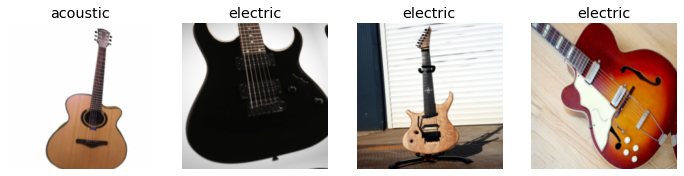

In [10]:
dls.show_batch(max_n=4,nrows=1)

### Training

Lets create our `model`.

![](https://media.giphy.com/media/SSirUu2TrV65ymCi4J/giphy.gif "Credit: https://giphy.com/gifs/back-to-school-SSirUu2TrV65ymCi4J")

In [11]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


`cnn_learner` tells fastai to create a `Convolutional Neural Network` with the `architecture` as `resnet50`, input `dataset` in the form of `DataLoaders` as `dls` and the `metric` as `error_rate`. `resnet50`(50 specifies number of layers, there are other variants such as 18, 34, 101, 152) is a model trained on the [imagenet dataset](http://www.image-net.org/). There are other architectures, but resnet is the standard so I won't plough through this any further. 

Remember I mentioned that `validation dataset` is used to test the performance of the model? Well, a `metric` provides the score of the model's performance on the `validation dataset` after every epoch. I have gone with `metrics=error_rate` but there are others such as `accuracy` which can be used, you can check them out [here](https://docs.fast.ai/metrics)

To train our model simply call `fine_tune` with number of `epochs` as the parameter.

In [12]:
learn.fine_tune(8)

And we have a guitar classifier with `0.07` error_rate (or `93%` accuracy) within 5 mins of training!!

As you can see from the above table, `loss` is calculated at every epoch. It is an indicator to the neural network on how good or bad the predictions are, depending on which the parameters of the neural network are adjusted during training. `Stochastic Gradient Descent` works behind the scenes to take care of this with the sole intention of reducing the loss. 

> Note: What we have done above is something called as `Transfer Learning`. We took resnet50 which was already trained on a large dataset with hundreds of categories and then used it as a backbone to train our model to predict three types of Guitars. We see that, building a classification model on top of something which is already good at predicting thousands of categories, helps in achieving great results in less time. Also, training a model requires setting a lot of `Hyperparameters` such as `learning rate` but we have used the defaults given by `fastai` which seem to work pretty well. 

![](https://media.giphy.com/media/26tn8zNgVmit475RK/giphy.gif "Credit: https://giphy.com/gifs/starwars-26tn8zNgVmit475RK")

> Important: Avoid overfitting! The most important rule of training any model. Overfitting occurs when the model memorizes the training data i.e the model learns the training data so well that it is terrible at generalising and performs very badly on perviously unseen data which contradicts the sole purpose of training. You can spot overfitting while trainng when the metric stops improving as the epochs progress, keep this in mind while playing with number of epochs!

## Insights from the model

We can use fastai to get some insights on the performance of the model. For instance we can get a confusion matrix by running the following code.

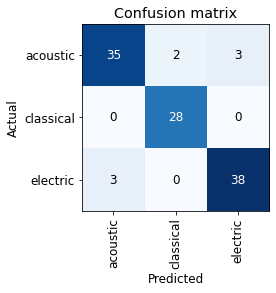

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Here's how you should read this matrix: 
Consider the element from the first row and the second column. `2` represents the number of images which were classified as `classical guitars` but actually belonged to `acoustic guitars`. 
    
Diagonal elements show the number of images which were classified correctly. Ideally all the elements should be zero except for the diagonals. This matrix is obtained by running the model on the `validation set`.

To further visualise the errors of the model, we can view the `top losses`. These are the images with highest losses which means the performance of our model was terrible on these images

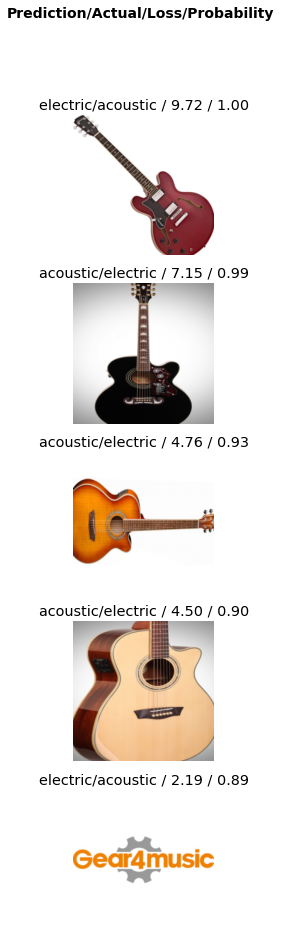

In [20]:
interp.plot_top_losses(5, nrows=5)

As can be seen from the above figure, the problem lies with our dataset! 

For example, the first image was predicted as `electric`(which is correct) by our model with `1.00` probability but it got very high loss of `9.72` as it belonged to the `acoustic`(which is wrong) category in our dataset; this needs to be rectified. The last image isn't a picture of a guitar at all, it should be deleted. 

Anyway, the point is that we need to clean our dataset. In the following section we will see how to clean it using the model we just trained!

## Cleaning the dataset 

When you run the following code, you should get a `widget` as shown in the pictures below. I could not render widgets in this blog post so I will try to explain `ImageClassifierCleaner` with the help of pictures.

In [21]:
cleaner = ImageClassifierCleaner(learn)
cleaner

Cleaner widget shows `top_loss` images for each category belonging to training as well as validation datasets. 

For each image, we need to select an action from the dropdown. 

Consider the picture shown below where the widget shows images of the `acoustic` category from `Train` dataset. I have selected the `<Delete>` action from the dropdown as that image is of a Portuguese Guitar which does not fit in any of the categories of our dataset. 

![](my_icons/cl1.jpeg)

Apart from deleting we can also `retag` an image if it does not belong to the correct category. In the example shown below, I have retagged the image to `Classical` category.

![](my_icons/cl2.jpeg)

Scroll through the images and select an appropriate action for every image.Once done, run the following cells to delete and retag the images.

In [31]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [32]:
for idx,cat in cleaner.change():
    if cleaner.fns[idx].name in [x.name for x in (path/cat).ls()]:
        new_path = cleaner.fns[idx].parent/(cleaner.fns[idx].stem+'x'+cleaner.fns[idx].suffix)
        cleaner.fns[idx].rename(new_path)
        shutil.move(str(new_path), path/cat)
    else:
        shutil.move(str(cleaner.fns[idx]), path/cat)

Repeat the exercise for `valid` dataset and the remaining categories by selecting the required fields from the dropdowns shown below.

![](my_icons/cl4.jpeg)

![](my_icons/cl3.jpeg)

> Important: The images shown in the cleaner come from `top_losses` hence these are the images where are model performed very badly, so we don't have to go through the entire dataset, but only through the images which gave a tough time to our model!

### Training again

![](https://media.giphy.com/media/yDYAHbqe5DfyM/giphy.gif "Credit: https://giphy.com/gifs/reaction-yDYAHbqe5DfyM")

We can then train our model again with the clean dataset and this should increase the accuracy.

In [35]:
fns = get_image_files(path)
dls = ImageDataLoaders.from_path_func(path,fns,parent_label,valid_pct=0.2,seed=42,item_tfms=RandomResizedCrop(224,min_scale=0.8),batch_tfms=aug_transforms())
learn = cnn_learner(dls, resnet50, metrics=error_rate)

In [36]:
learn.fine_tune(4)

As expected, we now an accuracy of `96%`!!

## Testing the model

To test our model, we have to call `learn.predict` on an image. I have uploaded an image called `img.jpeg` on colab. We can view it by running the following cell.

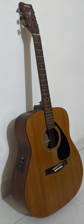

In [ ]:
img = PILImage.create('img.jpeg')
img.to_thumb(224,224)

Let's run our model on `img.jpeg`

In [ ]:
learn.predict(img)

('acoustic', tensor(0), tensor([9.9892e-01, 1.0841e-03, 1.6103e-08]))

`learn.predict` returns the category predicted, index of the category and the probabilities for all the categories. From the above output we can see that it is 99.892% sure that this image is of an acoustic guitar. The technical term for what we have done just now is `inference`; in English it is called `using the model to get predictions`.



Wouldn't it be cool if you could just upload a picture and get the prediction at the click of a button? Let's do it!

After you run the following cell, an upload button will appear in the notebook. I cannot render it in a blog post so I'll attach a picture. This `magic`, of a button appearing in a jupyter notebook, is done by `ipywidgets`; please check out their [documentation](https://ipywidgets.readthedocs.io/en/latest/) for other cool stuff you can do in a jupyter notebook.

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

![](my_icons/upload_button.png)

Now let's create the `classify` button

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

![](my_icons/classify_button.png)

Let's define a function `on_click_classify` which as the name suggests will get called when the button is pressed.

In [ ]:
out_pl = widgets.Output()
lbl_pred = widgets.Label()
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

Let's put it all together. Following cell just puts both the buttons and the required labels in a Vertical Box.

In [ ]:
VBox([widgets.Label('Select your guitar!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

![](my_icons/upload_classify.png)

You can now test the model by uploading pictures and clicking on classify button.

## Artifacts

When you call export method on the learner, it saves the model parameters and the architecture in `export.pkl` file. Whenever we want to use the model in an application, we can `load` it using this file by running `load_learner(/path/to/export.pkl)`.

In [37]:
learn.export()

What I usually do after training is save my model on Google Drive along with the custom dataset so that I can use the model in an app or fine tune it later. 

In [39]:
!mkdir /content/gdrive/My\ Drive/guitar-classifier

In [41]:
!cp -r data *.csv /content/gdrive/My\ Drive/guitar-classifier

In [43]:
!ls /content/gdrive/My\ Drive/guitar-classifier

acoustic.csv  classical.csv  data  electric.csv


## Making an App with Jupyter and Voila


One of the many things that blew my mind after going through the latest fastai course and the book was how `easy` it is to create an app in Jupyter without any knowledge of HTML, CSS or Web frameworks.

> Note: I switched from colab to localhost to develop the app after downloading the `export.pkl` file on my computer. However you can develop the app in Colab in a new notebook but you will have to save it in a Github repo and provide it to [binder](https://mybinder.org/) to build the app. 

We will use `voila` to create our app. It converts a jupyter notebook into an app by displaying only the markdown and the widgets from the notebook. Run the following cell to install and integrate voila with jupyter.

In [ ]:
!pip install voila
!jupyter serverextension enable voila —sys-prefix

I created a new notebook with the required imports and the ipywidgets code. The source code is available [here](https://github.com/rajaskakodkar/guitar-classifier) and you can view the notebook [here](https://nbviewer.jupyter.org/github/rajaskakodkar/guitar-classifier/blob/master/guitar-classifier-app.ipynb). You may notice a lot of ipywidgets in the notebook, it exists with the only intention to show off whatever I learnt from the [ipywidgets documentation](https://ipywidgets.readthedocs.io/en/latest/) :) 

Once you have the jupyter notebook running, replace `notebooks` from the URL with `voila/render` to generate the app.

This is how my app looks!!

![](my_icons/app.png)

I went a step ahead and deployed it on `Binder` so that I could share the [link](https://mybinder.org/v2/gh/rajaskakodkar/guitar-classifier/master?urlpath=%2Fvoila%2Frender%2Fguitar-classifier-app.ipynb) in this blog post. [Binder](https://mybinder.org/) is a free service which deploys jupyter notebooks using Docker and provides a sharable link for the same. I will not be talking about deployment in this post but I am plannning to write a blog post on deploying apps. However, if you want to deploy your app, you can check out [this part](https://youtu.be/5L3Ao5KuCC4?t=1922) of the course where Jeremy explains about deployment on Binder. If you are interested in learning about Docker and Kubernetes, you can drop your email-id in the comment section below or DM me on [Twitter](https://twitter.com/RajasKakodkar) or [mail me](rajaskakodkar16@gmail.com) so that I can send you a reminder when I release my next blog on Deployment. 

> Note: When you click on the above link to access the app, it will take some time for Binder to load the app so don't close the tab instantly if the app has not started.

## What's next

If you have reached here then I thank you for taking the time and reading this article! 

Next, I suggest you check out the [fastai course](https://course.fast.ai) to know more about the amazing world of Deep Learning and also start making your own Image Classification Apps. You can also check out [this series](https://muellerzr.github.io/fastblog/2020/08/21/beginner.html) by [Zach Mueller](https://twitter.com/TheZachMueller) called Zero to Hero with fastai.